# CMB PARAMETER SENSITIVITY

In [36]:
import numpy as np
import camb
import matplotlib.pyplot as plt
from camb.symbolic import *
sympy.init_printing()
print('CAMB: %s, Sympy: %s'%(camb.__version__,sympy.__version__))

CAMB: 1.5.4, Sympy: 1.12


Explanation of parameters:
* As: refers to the amplitude of the primordial scalar perturbations. It quantifies the initial density fluctuations in the early universe.
* ns: scalar spectral index. It describes how the amplitude of the density varies with scale.
* tau: optical depth to reionization (when stars are formed). It quantifies the opacity of the universe to light due to the scattering of photons by free electrons.
* H0: Hubble's parameter.
* ombh2: density of baryonic matter. This is affected by acoustic baryonic oscillations (BAO).
* omch2: density of cold dark matter. This is affected by acoustic oscillations.

In [37]:
#Set the cosmology parameters
pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
#print(pars)

Text(0.5, 1.0, 'CMB power spectrum')

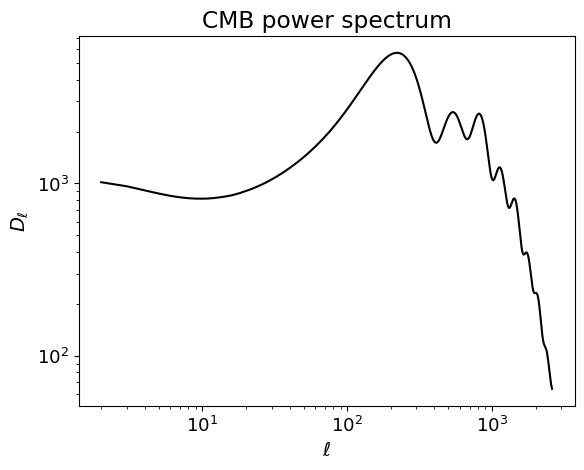

In [38]:
#Plot the CMB temperature power spectrum
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ell = np.arange(totCL.shape[0]) #ell is the multipole moment


#make the plot
plt.plot(ell[2:],totCL[2:,0], color='k')
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.title('CMB power spectrum')


Contributions to the spectrum:

* Monopole: refers to the uniform, isotropic component of the CMB radiation, which represents the average temperature of the CMB. It is the dominant term, in fact the CMB is almost isotropic.

* Dipole (or Doppler): Represent the first order variation in the CMB temperature due to the Doppler shift caused by the motion of the Earth relative to the CMB rest frame.

* Quadrupole: This term represents the finer structure of the temperature fluctuations and contain information about the density perturbations in the early universe, acoustic peaks, and the physics of the primordial plasma.

* ISW: is a phenomenon that affects the temperature fluctuations observed in the CMB. It occurs due to the interaction of CMB photons with the gravitational potential wells of large-scale structures in the universe. It is divided in two types:

1- Early ISW: between radiation domination era and early matter domination era.

2- Late ISW: dark energy era

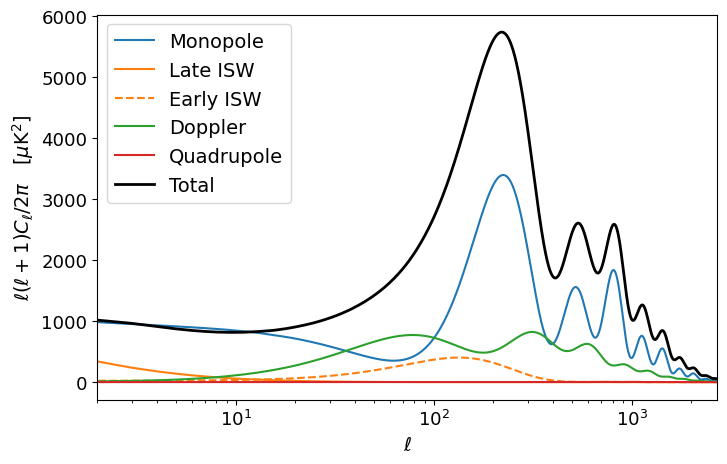

In [39]:
#Plot the monopole, dipole, early/late ISW contributions to the spectrum:
#(Sachs_Wolfe effect is a property of CMB photons that are gravitationally redshifted -->so CMB is not homogeneous)

# You can also calculate power spectra for custom source functions.
# For example, let's split up the standard temperature result into the various sub-terms,
# and see how they contribute to the total 

monopole_source, ISW, doppler, quadrupole_source = get_scalar_temperature_sources()

#In[27]
from matplotlib import rcParams
rcParams.update( {'axes.labelsize': 14,
              'font.size': 14,
              'legend.fontsize': 14,
              'xtick.labelsize': 13,
              'ytick.labelsize': 13})
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'

#In[29]
early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)

data= camb.get_results(pars)
dic = data.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(8,5))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], ls='--', color='C1')
plt.semilogx(ls,dic['dopxdop'],color='C2')
plt.semilogx(ls,dic['QxQ'], color='C3')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');

Now I want to vary the parameters by 10 % and repeat the calculation

* Now I modify all parameters


In [40]:

#Now I want to vary the parameters by 10 % and repeat the calculation

'''
The parameters of 2018 Planck are:
H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561
#where tau is the optical depth to reionization

#For the primordial power spectrum parameters
As=2.105e-9, ns=0.9665
#where As is the amplitude of the primordial power spectrum,
#ns is the scalar spectral index,
#r is the tensor-to-scalar ratio
'''
#Parameters varied by 10%:
pars_new = pars.copy()
#Initialize the parameters
#pars_new = camb.CAMBparams()
pars_new.set_cosmology(H0=67.66*1.1, ombh2=0.02242*1.1, omch2=0.11933*1.1, tau=0.0561*1.1)
pars_new.InitPower.set_params(As=2.105e-9*1.1, ns=0.9665*1.1)
results_new = camb.get_results(pars_new)
powers_new = results_new.get_cmb_power_spectra(pars_new, CMB_unit='muK')
totCL_new = powers['total']
ell_new = np.arange(totCL_new.shape[0]) #ell is the multipole moment
'''
#Now i make the plot again above the previous plot(in black)
#For the CMB temperature power spectrum:
plt.plot(ell_new[2:],totCL_new[2:,0], color='orange')
plt.plot(ell[2:],totCL[2:,0], color='k')
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.title('CMB power spectrum')
'''
#I DUE GRAFICI SONO SOVRAPPPOSTI, PRCHEEEE

"\n#Now i make the plot again above the previous plot(in black)\n#For the CMB temperature power spectrum:\nplt.plot(ell_new[2:],totCL_new[2:,0], color='orange')\nplt.plot(ell[2:],totCL[2:,0], color='k')\nplt.xscale('log');plt.yscale('log')\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$D_\\ell$')\nplt.title('CMB power spectrum')\n"

(2, 2700)

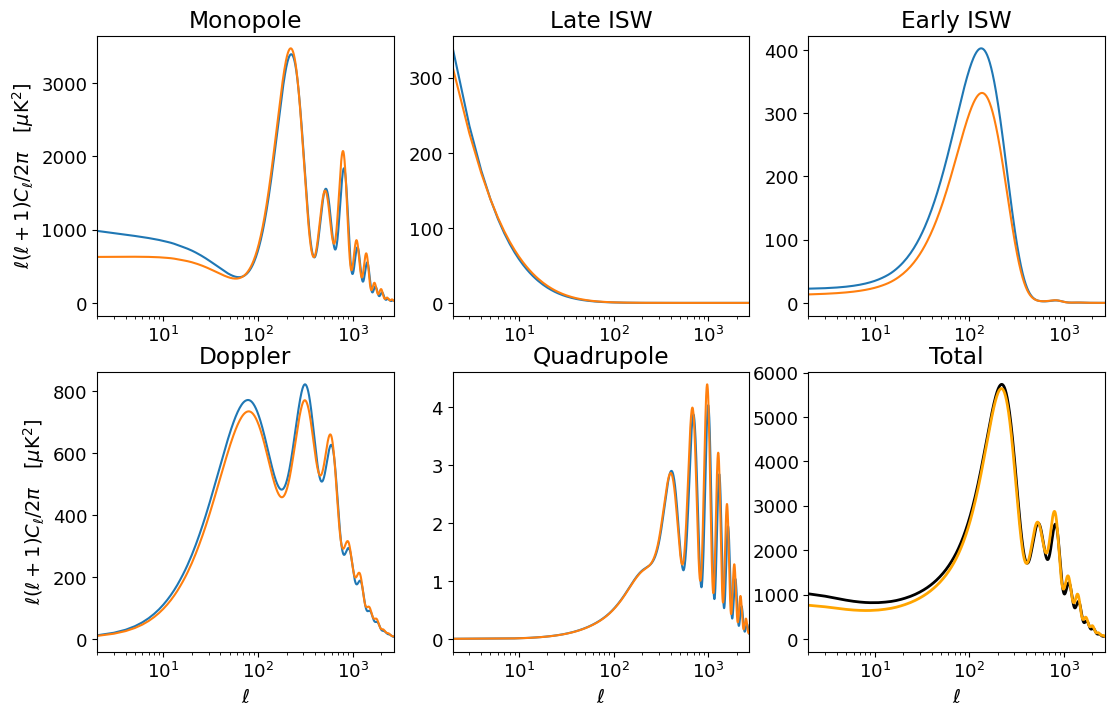

In [41]:
#Now I can do for the monopole, dipole, early/late ISW contributions to the spectrum:
monopole_source_new, ISW_new, doppler_new, quadrupole_source_new = get_scalar_temperature_sources()

#In[29]
early_ISW_new = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW_new = ISW_new - early_ISW_new

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_new.set_custom_scalar_sources([monopole_source_new, ISW_new, early_ISW_new, late_ISW_new ,doppler_new ,quadrupole_source_new], 
        source_names =names)

data_new = camb.get_results(pars_new)
dic_new = data_new.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic_new['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic_new['monxmon'], color='C1') #new
#plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='C0')
plt.semilogx(ls,dic_new['LISWxLISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='C0')
plt.semilogx(ls,dic_new['eISWxeISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='C0')
plt.semilogx(ls,dic_new['dopxdop'],color='C1')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='C0')
plt.semilogx(ls,dic_new['QxQ'], color='C1')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic_new['TxT'], lw=2, color='orange')
plt.title('Total')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
#plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');

* Now I modify only As

In [42]:
#For the CMB temperature power spectrum:
#As varied by 10%:
pars_As = pars.copy()
#Initialize the parameters
#pars_new = camb.CAMBparams()
pars_As.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)
pars_As.InitPower.set_params(As=2.105e-9*1.1, ns=0.9665)
results_As = camb.get_results(pars_As)
powers_As = results_As.get_cmb_power_spectra(pars_As, CMB_unit='muK')
totCL_As = powers['total']
ell_As = np.arange(totCL_As.shape[0]) #ell is the multipole moment
'''
#Now i make the plot again above the previous plot(in black)
#For the CMB temperature power spectrum:
plt.plot(ell_As[2:],totCL_As[2:,0], color='orange')
plt.plot(ell[2:],totCL[2:,0], color='k')
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.title('CMB power spectrum')
'''

"\n#Now i make the plot again above the previous plot(in black)\n#For the CMB temperature power spectrum:\nplt.plot(ell_As[2:],totCL_As[2:,0], color='orange')\nplt.plot(ell[2:],totCL[2:,0], color='k')\nplt.xscale('log');plt.yscale('log')\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$D_\\ell$')\nplt.title('CMB power spectrum')\n"

(2, 2700)

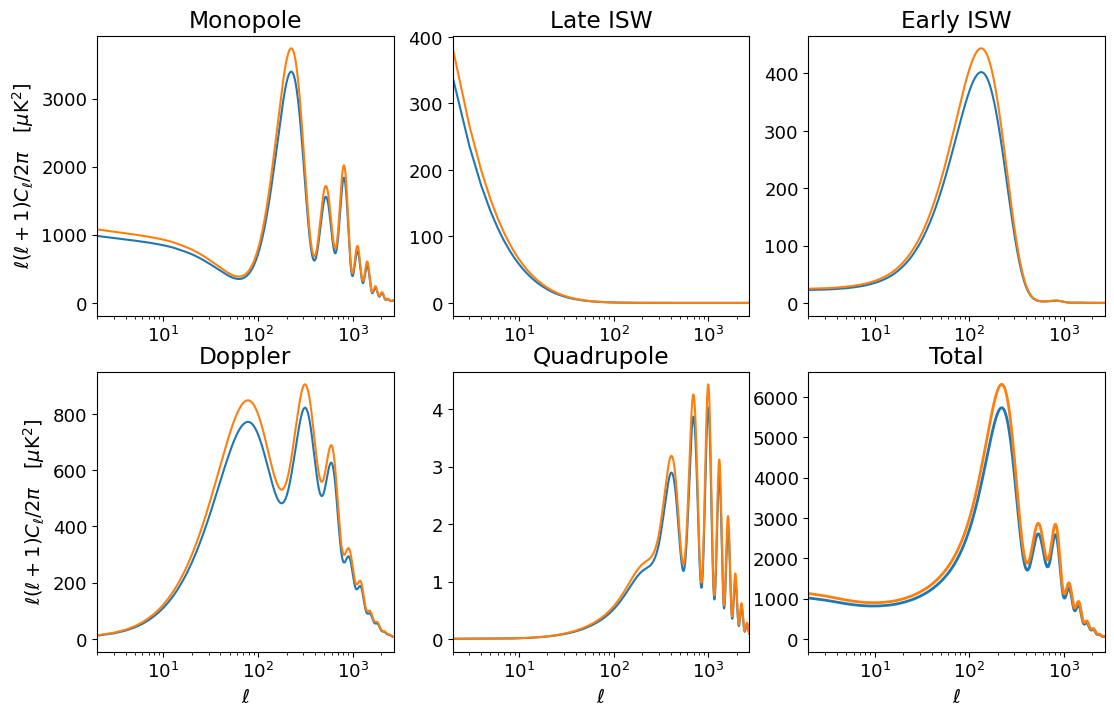

In [43]:
#Now I can do for the monopole, dipole, early/late ISW contributions to the spectrum:
monopole_source_As, ISW_As, doppler_As, quadrupole_source_As = get_scalar_temperature_sources()

#In[29]
early_ISW_As = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW_As = ISW_As - early_ISW_As

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_As.set_custom_scalar_sources([monopole_source_As, ISW_As, early_ISW_As, late_ISW_As ,doppler_As ,quadrupole_source_As], 
        source_names =names)

data_As = camb.get_results(pars_As)
dic_As = data_As.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic_As['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic_As['monxmon'], color='C1') #new
#plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='C0')
plt.semilogx(ls,dic_As['LISWxLISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='C0')
plt.semilogx(ls,dic_As['eISWxeISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='C0')
plt.semilogx(ls,dic_As['dopxdop'],color='C1')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='C0')
plt.semilogx(ls,dic_As['QxQ'], color='C1')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='C0')
plt.semilogx(ls,dic_As['TxT'], lw=2, color='C1')
plt.title('Total')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])

Observations:

As: It changes the amplitude of the spectrum. We can see that the amplitude of the total body is greater than the "standard" case. It is correct because As is related to the amplitude.

* Now I modify only tau

(I will not change the name of parameters because I don't want waste the time-->I will use pars_)

In [44]:
#For the CMB temperature power spectrum:
#As varied by 10%:
pars_ = pars.copy()
#Initialize the parameters
#pars_new = camb.CAMBparams()
pars_.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561*1.1)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665)
results_ = camb.get_results(pars_)
powers_ = results_.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_ = powers['total']
ell_ = np.arange(totCL_.shape[0]) #ell is the multipole moment
'''
#Now i make the plot again above the previous plot(in black)
#For the CMB temperature power spectrum:
plt.plot(ell_As[2:],totCL_As[2:,0], color='orange')
plt.plot(ell[2:],totCL[2:,0], color='k')
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.title('CMB power spectrum')
'''

"\n#Now i make the plot again above the previous plot(in black)\n#For the CMB temperature power spectrum:\nplt.plot(ell_As[2:],totCL_As[2:,0], color='orange')\nplt.plot(ell[2:],totCL[2:,0], color='k')\nplt.xscale('log');plt.yscale('log')\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$D_\\ell$')\nplt.title('CMB power spectrum')\n"

(2, 2700)

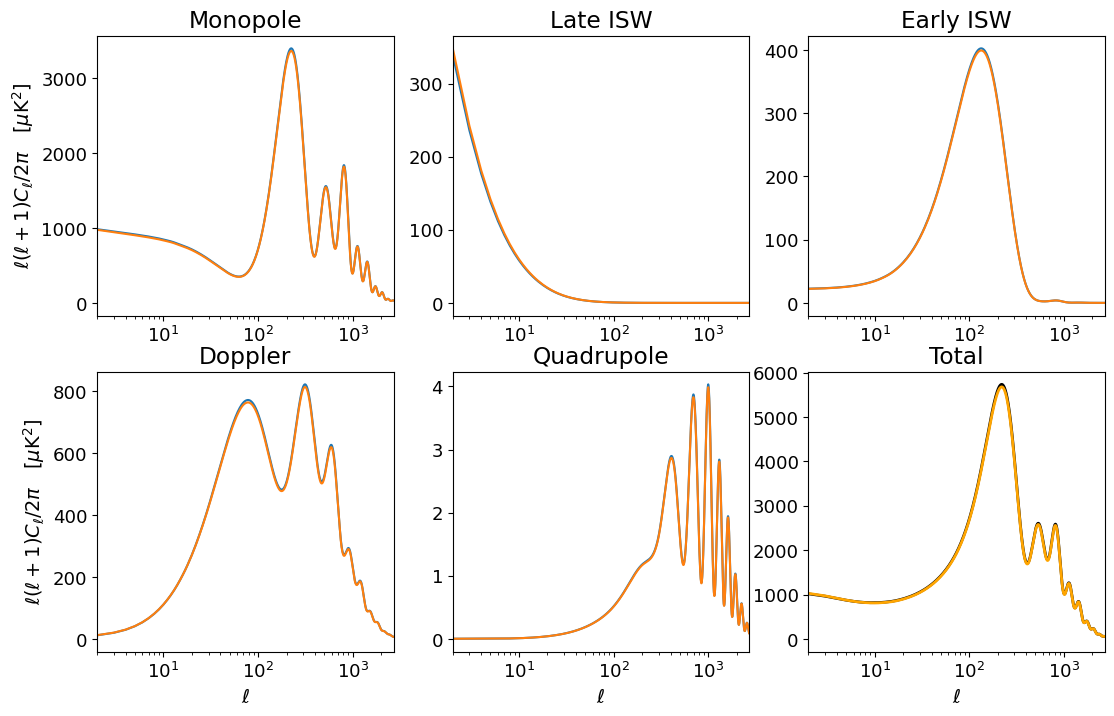

In [45]:
#Now I can do for the monopole, dipole, early/late ISW contributions to the spectrum:
monopole_source_, ISW_, doppler_, quadrupole_source_ = get_scalar_temperature_sources()

#In[29]
early_ISW_ = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW_ = ISW_ - early_ISW_

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_, ISW_, early_ISW_, late_ISW_ ,doppler_ ,quadrupole_source_], 
        source_names =names)

data_ = camb.get_results(pars_)
dic_ = data_.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic_['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic_['monxmon'], color='C1') #new
#plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='C0')
plt.semilogx(ls,dic_['LISWxLISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='C0')
plt.semilogx(ls,dic_['eISWxeISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='C0')
plt.semilogx(ls,dic_['dopxdop'],color='C1')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='C0')
plt.semilogx(ls,dic_['QxQ'], color='C1')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic_['TxT'], lw=2, color='orange')
plt.title('Total')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])

Observations:

We can see that the amplitude of the total spectrum is minor than the "standard case" because if the opacity of the universe increases, we receive less photons.

Now I change only ns

In [46]:
 #For the CMB temperature power spectrum:
#As varied by 10%:
pars_ = pars.copy()
#Initialize the parameters
#pars_new = camb.CAMBparams()
pars_.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665*1.1)
results_ = camb.get_results(pars_)
powers_ = results_.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_ = powers['total']
ell_ = np.arange(totCL_.shape[0]) #ell is the multipole moment
'''
#Now i make the plot again above the previous plot(in black)
#For the CMB temperature power spectrum:
plt.plot(ell_As[2:],totCL_As[2:,0], color='orange')
plt.plot(ell[2:],totCL[2:,0], color='k')
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.title('CMB power spectrum')
'''

"\n#Now i make the plot again above the previous plot(in black)\n#For the CMB temperature power spectrum:\nplt.plot(ell_As[2:],totCL_As[2:,0], color='orange')\nplt.plot(ell[2:],totCL[2:,0], color='k')\nplt.xscale('log');plt.yscale('log')\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$D_\\ell$')\nplt.title('CMB power spectrum')\n"

(2, 2700)

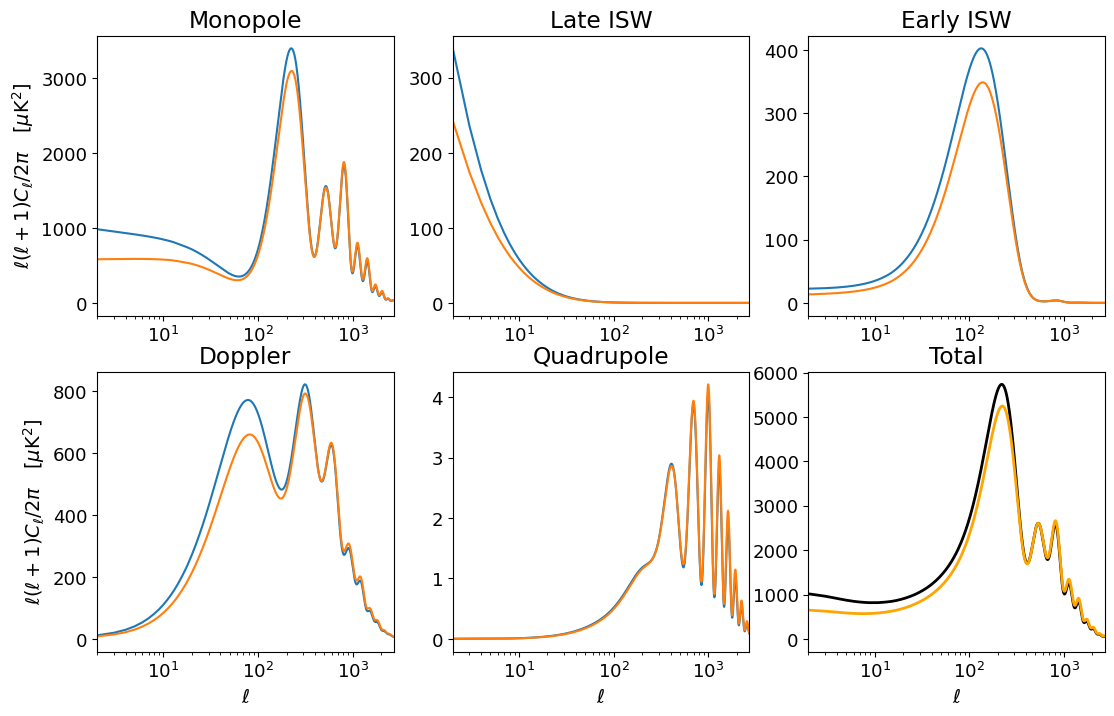

In [47]:
#Now I can do for the monopole, dipole, early/late ISW contributions to the spectrum:
monopole_source_, ISW_, doppler_, quadrupole_source_ = get_scalar_temperature_sources()

#In[29]
early_ISW_ = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW_ = ISW_ - early_ISW_

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_, ISW_, early_ISW_, late_ISW_ ,doppler_ ,quadrupole_source_], 
        source_names =names)

data_ = camb.get_results(pars_)
dic_ = data_.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic_['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic_['monxmon'], color='C1') #new
#plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='C0')
plt.semilogx(ls,dic_['LISWxLISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='C0')
plt.semilogx(ls,dic_['eISWxeISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='C0')
plt.semilogx(ls,dic_['dopxdop'],color='C1')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='C0')
plt.semilogx(ls,dic_['QxQ'], color='C1')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic_['TxT'], lw=2, color='orange')
plt.title('Total')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])

Observations:

As we can see in another cases the changes are above all with a small l (i.e. large scale). This thing has a sense because the CMB's fluctuations are above all at a large scale. 

This is a general consideration, but I know that ns is index that tells me how the amplitude of the density varies with the scale, and we can see this fact in these graphs --> we can see more changes at small l. 

Now I change only ombh2

In [48]:
 #For the CMB temperature power spectrum:
#As varied by 10%:
pars_ = pars.copy()
#Initialize the parameters
#pars_new = camb.CAMBparams()
pars_.set_cosmology(H0=67.66, ombh2=0.02242*1.1, omch2=0.11933, tau=0.0561)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665)
results_ = camb.get_results(pars_)
powers_ = results_.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_ = powers['total']
ell_ = np.arange(totCL_.shape[0]) #ell is the multipole moment
'''
#Now i make the plot again above the previous plot(in black)
#For the CMB temperature power spectrum:
plt.plot(ell_As[2:],totCL_As[2:,0], color='orange')
plt.plot(ell[2:],totCL[2:,0], color='k')
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.title('CMB power spectrum')
'''

"\n#Now i make the plot again above the previous plot(in black)\n#For the CMB temperature power spectrum:\nplt.plot(ell_As[2:],totCL_As[2:,0], color='orange')\nplt.plot(ell[2:],totCL[2:,0], color='k')\nplt.xscale('log');plt.yscale('log')\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$D_\\ell$')\nplt.title('CMB power spectrum')\n"

(2, 2700)

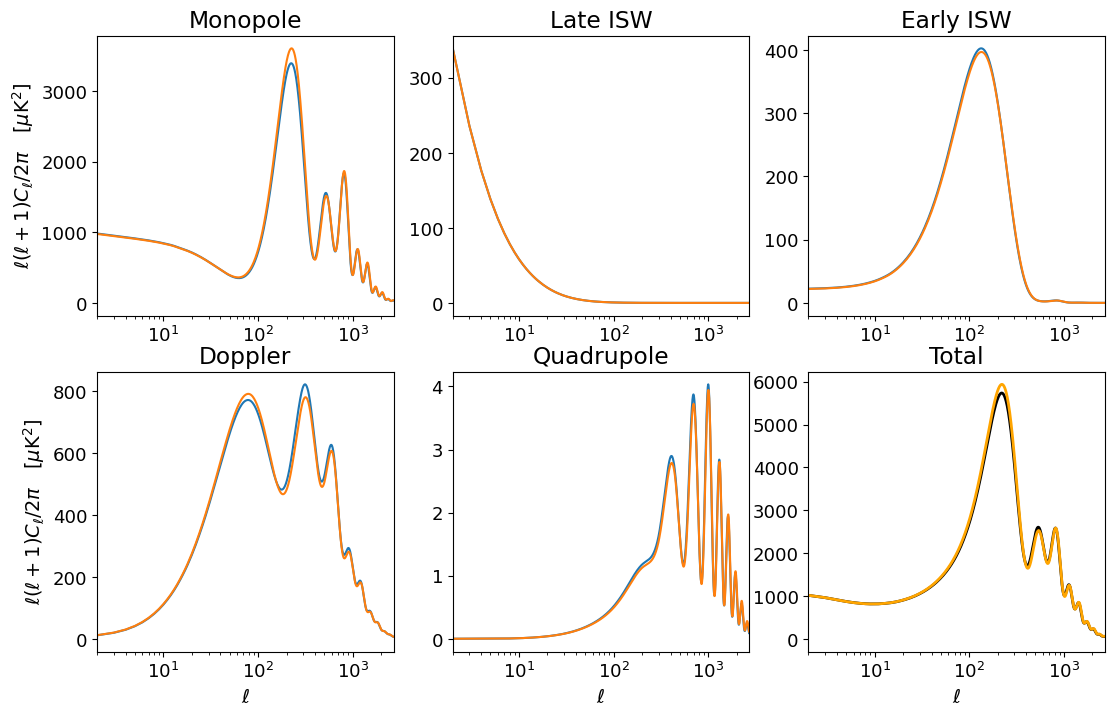

In [49]:
#Now I can do for the monopole, dipole, early/late ISW contributions to the spectrum:
monopole_source_, ISW_, doppler_, quadrupole_source_ = get_scalar_temperature_sources()

#In[29]
early_ISW_ = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW_ = ISW_ - early_ISW_

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_, ISW_, early_ISW_, late_ISW_ ,doppler_ ,quadrupole_source_], 
        source_names =names)

data_ = camb.get_results(pars_)
dic_ = data_.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic_['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic_['monxmon'], color='C1') #new
#plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='C0')
plt.semilogx(ls,dic_['LISWxLISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='C0')
plt.semilogx(ls,dic_['eISWxeISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='C0')
plt.semilogx(ls,dic_['dopxdop'],color='C1')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='C0')
plt.semilogx(ls,dic_['QxQ'], color='C1')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic_['TxT'], lw=2, color='orange')
plt.title('Total')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])

Observations:

We can see that the Late ISW does not change, in fact the Late ISW is relative to dark energy domination.

Now I will change only omch2 (cold dark matter):

In [50]:
#For the CMB temperature power spectrum:
#As varied by 10%:
pars_ = pars.copy()
#Initialize the parameters
#pars_new = camb.CAMBparams()
pars_.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933*1.1, tau=0.0561)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665)
results_ = camb.get_results(pars_)
powers_ = results_.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_ = powers['total']
ell_ = np.arange(totCL_.shape[0]) #ell is the multipole moment
'''
#Now i make the plot again above the previous plot(in black)
#For the CMB temperature power spectrum:
plt.plot(ell_As[2:],totCL_As[2:,0], color='orange')
plt.plot(ell[2:],totCL[2:,0], color='k')
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.title('CMB power spectrum')
'''

"\n#Now i make the plot again above the previous plot(in black)\n#For the CMB temperature power spectrum:\nplt.plot(ell_As[2:],totCL_As[2:,0], color='orange')\nplt.plot(ell[2:],totCL[2:,0], color='k')\nplt.xscale('log');plt.yscale('log')\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$D_\\ell$')\nplt.title('CMB power spectrum')\n"

(2, 2700)

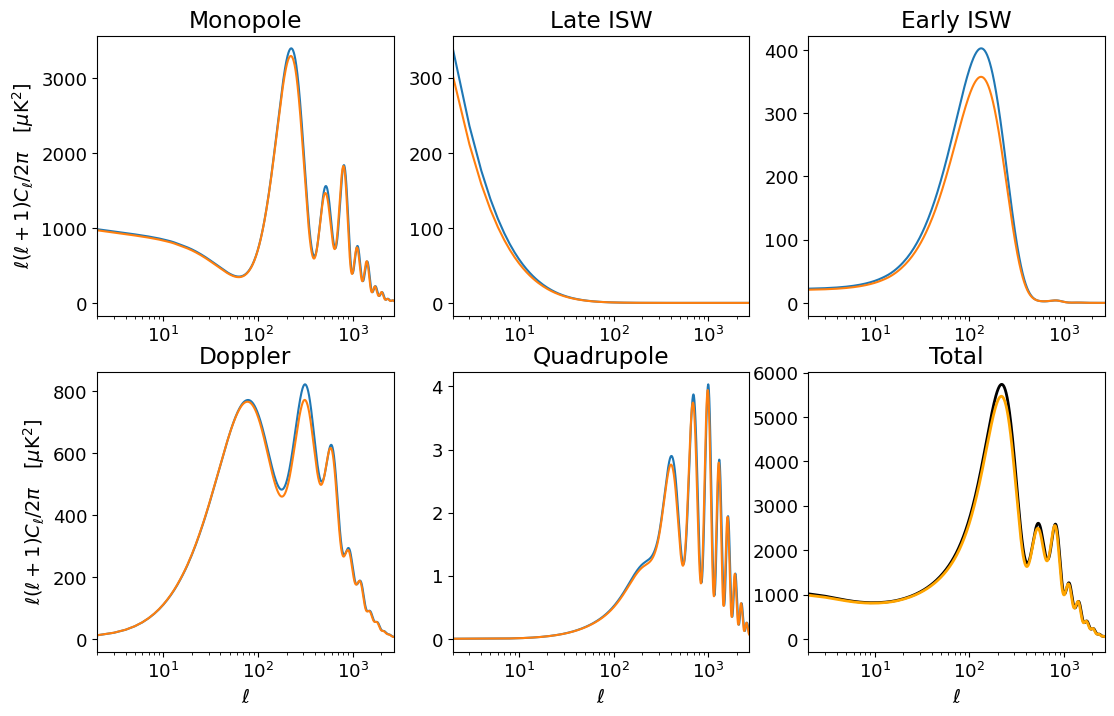

In [51]:
#Now I can do for the monopole, dipole, early/late ISW contributions to the spectrum:
monopole_source_, ISW_, doppler_, quadrupole_source_ = get_scalar_temperature_sources()

#In[29]
early_ISW_ = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW_ = ISW_ - early_ISW_

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_, ISW_, early_ISW_, late_ISW_ ,doppler_ ,quadrupole_source_], 
        source_names =names)

data_ = camb.get_results(pars_)
dic_ = data_.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic_['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic_['monxmon'], color='C1') #new
#plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='C0')
plt.semilogx(ls,dic_['LISWxLISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='C0')
plt.semilogx(ls,dic_['eISWxeISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='C0')
plt.semilogx(ls,dic_['dopxdop'],color='C1')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='C0')
plt.semilogx(ls,dic_['QxQ'], color='C1')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic_['TxT'], lw=2, color='orange')
plt.title('Total')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])

Observations:

We can see that the peaks of the early ISW is less tall than the "standard" parameters, because the cold dark matter evidently changes something in a transition between radiation domination and matter domination.

Now I will change only H0

In [52]:
#For the CMB temperature power spectrum:
#As varied by 10%:
pars_ = pars.copy()
#Initialize the parameters
#pars_new = camb.CAMBparams()
pars_.set_cosmology(H0=67.66*1.1, ombh2=0.02242, omch2=0.11933, tau=0.0561)
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665)
results_ = camb.get_results(pars_)
powers_ = results_.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_ = powers['total']
ell_ = np.arange(totCL_.shape[0]) #ell is the multipole moment
'''
#Now i make the plot again above the previous plot(in black)
#For the CMB temperature power spectrum:
plt.plot(ell_As[2:],totCL_As[2:,0], color='orange')
plt.plot(ell[2:],totCL[2:,0], color='k')
plt.xscale('log');plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.title('CMB power spectrum')
'''

"\n#Now i make the plot again above the previous plot(in black)\n#For the CMB temperature power spectrum:\nplt.plot(ell_As[2:],totCL_As[2:,0], color='orange')\nplt.plot(ell[2:],totCL[2:,0], color='k')\nplt.xscale('log');plt.yscale('log')\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$D_\\ell$')\nplt.title('CMB power spectrum')\n"

(2, 2700)

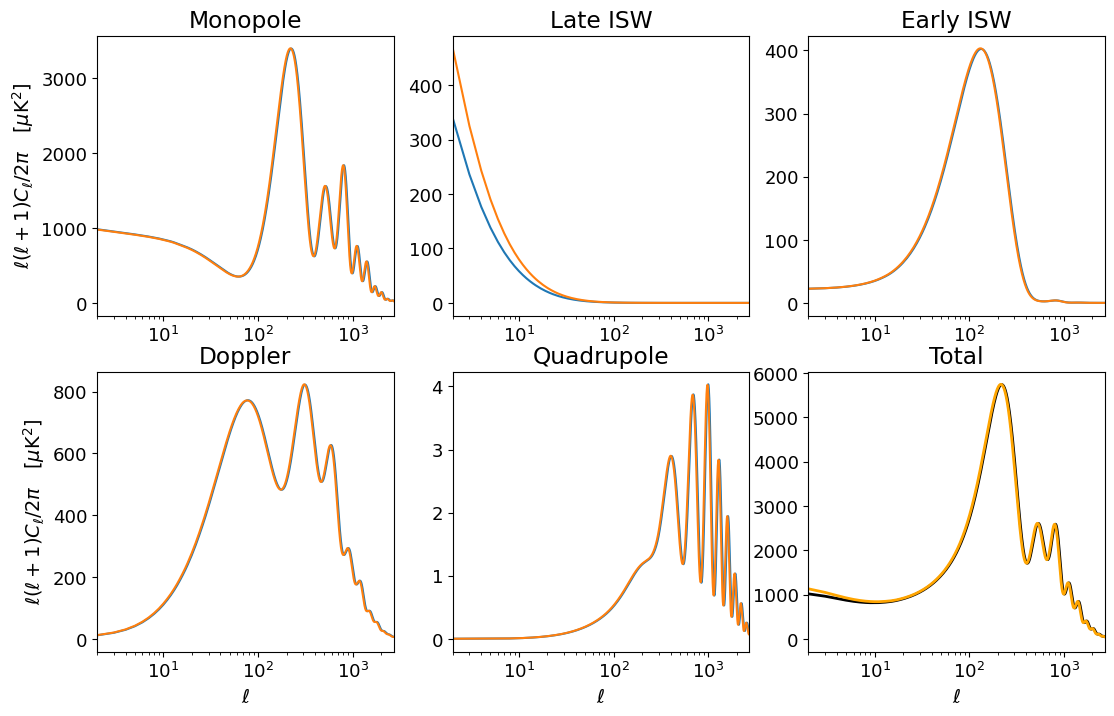

In [53]:
#Now I can do for the monopole, dipole, early/late ISW contributions to the spectrum:
monopole_source_, ISW_, doppler_, quadrupole_source_ = get_scalar_temperature_sources()

#In[29]
early_ISW_ = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW_ = ISW_ - early_ISW_

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_, ISW_, early_ISW_, late_ISW_ ,doppler_ ,quadrupole_source_], 
        source_names =names)

data_ = camb.get_results(pars_)
dic_ = data_.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic_['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic_['monxmon'], color='C1') #new
#plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='C0')
plt.semilogx(ls,dic_['LISWxLISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='C0')
plt.semilogx(ls,dic_['eISWxeISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='C0')
plt.semilogx(ls,dic_['dopxdop'],color='C1')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='C0')
plt.semilogx(ls,dic_['QxQ'], color='C1')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic_['TxT'], lw=2, color='orange')
plt.title('Total')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])

Observations:

We can see the only graph that is changed is the Late ISW, because if H0 is greater a_dot is greater. Hence the universe expands faster, but we know that dark energy has w=-1 and give an accelerated expansion. For the conclusion: if H0 changes, dark energy changes and hence Late ISW changes.

# Excerise 2

*Mass of neutrino

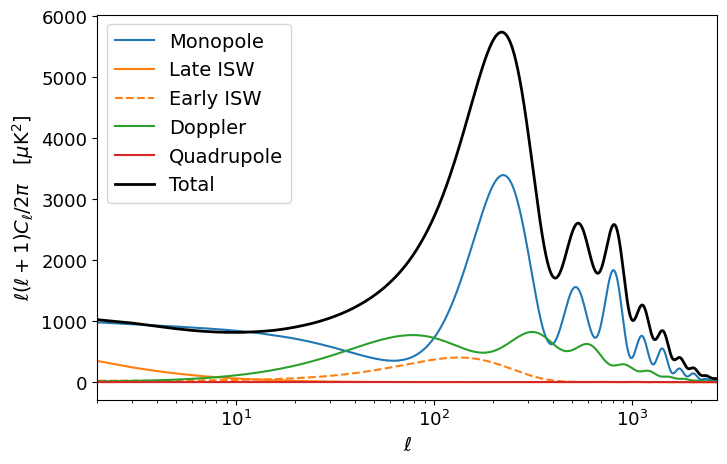

In [54]:
#Plot the monopole, dipole, early/late ISW contributions to the spectrum:
#(Sachs_Wolfe effect is a property of CMB photons that are gravitationally redshifted -->so CMB is not homogeneous)

# You can also calculate power spectra for custom source functions.
# For example, let's split up the standard temperature result into the various sub-terms,
# and see how they contribute to the total 
#Set the cosmology with the mass of neutrinos
pars.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561, mnu=0.06)
pars.InitPower.set_params(As=2.105e-9, ns=0.9665)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ell = np.arange(totCL.shape[0]) #ell is the multipole moment

monopole_source, ISW, doppler, quadrupole_source = get_scalar_temperature_sources()

#In[27]
from matplotlib import rcParams
rcParams.update( {'axes.labelsize': 14,
              'font.size': 14,
              'legend.fontsize': 14,
              'xtick.labelsize': 13,
              'ytick.labelsize': 13})
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'

#In[29]
early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)

data= camb.get_results(pars)
dic = data.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(8,5))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], ls='--', color='C1')
plt.semilogx(ls,dic['dopxdop'],color='C2')
plt.semilogx(ls,dic['QxQ'], color='C3')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');

I want to vary the mass of neutrino:

In [55]:
#Set the cosmology with the mass of neutrinos
pars_ = pars.copy()
pars_.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561, mnu=1) #0.06
pars_.InitPower.set_params(As=2.105e-9, ns=0.9665)
results_ = camb.get_results(pars_)
powers_ = results_.get_cmb_power_spectra(pars_, CMB_unit='muK')
totCL_ = powers_['total']
ell_ = np.arange(totCL_.shape[0]) #ell is the multipole moment

(2, 2700)

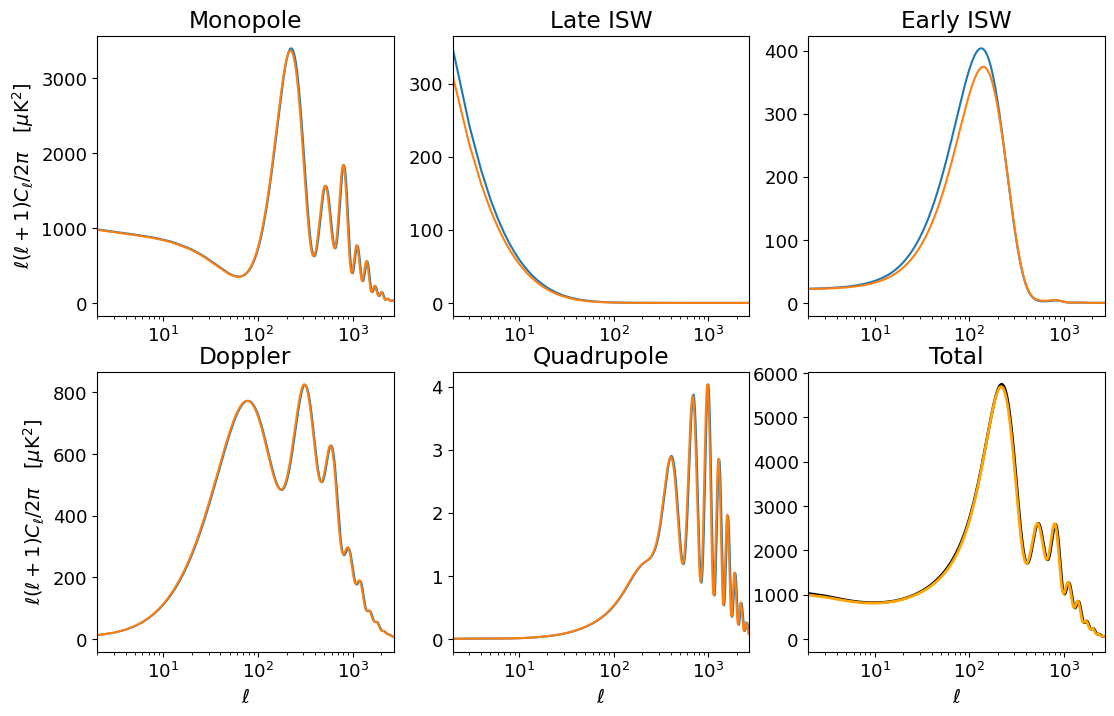

In [56]:
#Now I can do for the monopole, dipole, early/late ISW contributions to the spectrum:
monopole_source_, ISW_, doppler_, quadrupole_source_ = get_scalar_temperature_sources()

#In[29]
early_ISW_ = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW_ = ISW_ - early_ISW_

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars_.set_custom_scalar_sources([monopole_source_, ISW_, early_ISW_, late_ISW_ ,doppler_ ,quadrupole_source_], 
        source_names =names)

data_ = camb.get_results(pars_)
dic_ = data_.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

#In[30]
ls =np.arange(dic_['TxT'].shape[0])
plt.figure(figsize=(13,8))
#first graph (monopole)
plt.subplot(2,3,1)
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic_['monxmon'], color='C1') #new
#plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Monopole')
#second graph (LATE ISW)
plt.subplot(2,3,2)
plt.semilogx(ls,dic['LISWxLISW'], color='C0')
plt.semilogx(ls,dic_['LISWxLISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Late ISW')
#third graph (EARLY ISW)
plt.subplot(2,3,3)
plt.semilogx(ls,dic['eISWxeISW'], color='C0')
plt.semilogx(ls,dic_['eISWxeISW'], color='C1')
#plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Early ISW')
#fourth graph (Doppler)
plt.subplot(2,3,4)
plt.semilogx(ls,dic['dopxdop'],color='C0')
plt.semilogx(ls,dic_['dopxdop'],color='C1')
plt.xlabel('$\ell$')
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Doppler')
#fifth graph (Quadrupole)
plt.subplot(2,3,5)
plt.semilogx(ls,dic['QxQ'], color='C0')
plt.semilogx(ls,dic_['QxQ'], color='C1')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.title('Quadrupole')
#sixth graph (Total)
plt.subplot(2,3,6)
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic_['TxT'], lw=2, color='orange')
plt.title('Total')
plt.xlabel('$\ell$')
#plt.ylabel(cl_label)
plt.xlim(2, ls[-1])

One of the parameters that are not related to the six base LCDM parameters is: Curvature

In [57]:
#I decided to change omk to see how the power spectrum changes
#In Planck 2018 omk = 0.0 --> now I set omk = 0.1 and I plot the power spectrum:


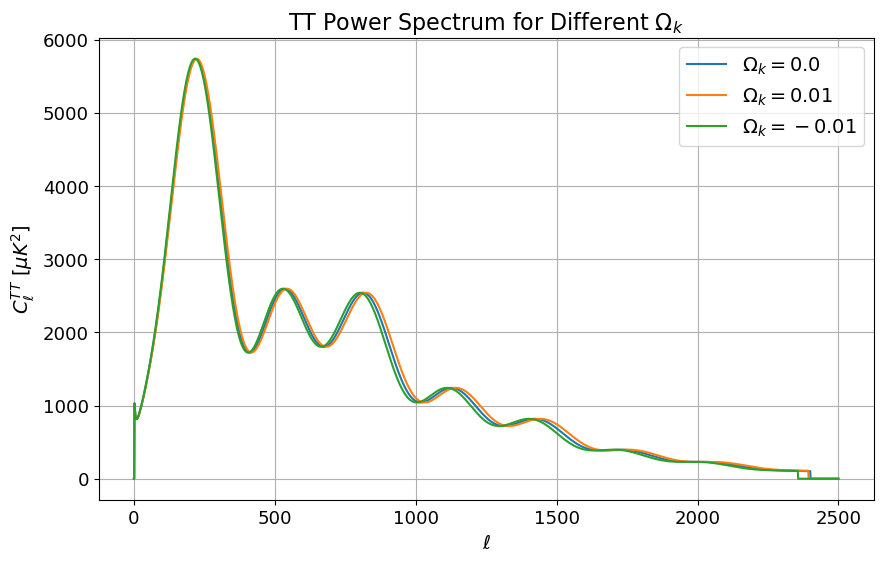

In [58]:
'''
idea: scrivo i parametri di planck come in questo esempio sopra e poi faccio come sopra 
cioe cambio omk e vedo come cambia il power spectrum
'''

#Initialize the parameters
params = camb.CAMBparams()

#Set the cosmology parameters (Set Planck 2018 parameters)
params.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)

#Set the primordial power spectrum parameters
params.InitPower.set_params(As=2.105e-9, ns=0.9665) #, r=0

#Create a function to calculate the power spectrum for a given omk value
def calculate_power_spectrum(omk_value):
    #Update only the omk parameter
    params.set_cosmology(omk=omk_value, H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)
    results = camb.get_results(params)
    powers = results.get_cmb_power_spectra(params, lmax=2500, CMB_unit='muK')
    return powers['total']

#Pick 3 values of omk to calculate the power spectrum:
omk_values = [0.0, 0.01, -0.01]

#Calculate the power spectrum for each omk value:
spectra = {}
for omk in omk_values:
    spectra[omk] = calculate_power_spectrum(omk)

#Plot the TT power spectrum for the different omk values:
plt.figure(figsize=(10, 6))

for omk in omk_values:
    ell = np.arange(spectra[omk].shape[0])
    cl_tt = spectra[omk][:, 0]
    plt.plot(ell, cl_tt, label=f'$\Omega_k={omk}$')

plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell^{TT}$ [$\mu K^2$]', fontsize=14)
plt.title('TT Power Spectrum for Different $\Omega_k$', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Dati Planck


/tmp/ipykernel_5789/4099241262.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['l', 'Dl', '-dDl', '+dDl'])


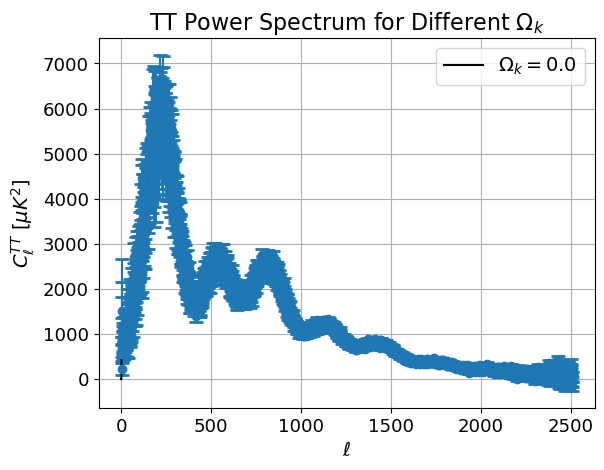

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file
file_path = './Dati_planck.txt'
df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['l', 'Dl', '-dDl', '+dDl'])

# Plot the data

#plt.figure(figsize=(10, 6))
plt.errorbar(df['l'], df['Dl'], yerr=[df['-dDl'], df['+dDl']], fmt='o', capsize=5, capthick=2)
plt.xlabel('$l$')
plt.ylabel('$D_l$')
plt.title('Planck Data')
plt.grid(True)
#plt.show()

#Initialize the parameters
params = camb.CAMBparams()

#Set the cosmology parameters (Set Planck 2018 parameters)
params.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)

#Set the primordial power spectrum parameters
params.InitPower.set_params(As=2.105e-9, ns=0.9665) #, r=0

#Create a function to calculate the power spectrum for a given omk value
def calculate_power_spectrum(omk_value):
    #Update only the omk parameter
    params.set_cosmology(omk=omk_value, H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)
    results = camb.get_results(params)
    powers = results.get_cmb_power_spectra(params, lmax=2500, CMB_unit='muK')
    return powers['total']

#Pick 3 values of omk to calculate the power spectrum:
omk_values = [0.0]

#Calculate the power spectrum for each omk value:
spectra = {}
for omk in omk_values:
    spectra[omk] = calculate_power_spectrum(omk)

#Plot the TT power spectrum for the different omk values:
#plt.figure(figsize=(10, 6))

for omk in omk_values:
    ell = np.arange(spectra[omk].shape[0])
    cl_tt = spectra[omk][:, 0]
    plt.plot(ell, cl_tt, label=f'$\Omega_k={omk}$', linestyle='-', color='black')

plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell^{TT}$ [$\mu K^2$]', fontsize=14)
plt.title('TT Power Spectrum for Different $\Omega_k$', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_5789/2428578648.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['l', 'Dl', '-dDl', '+dDl'])
/tmp/ipykernel_5789/2428578648.py:38: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(df['l'], df['Dl'], yerr=[df['-dDl'], df['+dDl']], fmt='o',  color='y', capsize=0.3, capthick=0.3, elinewidth=0.3, marker='o', markersize=0.3, label='Planck Data', zorder=2)


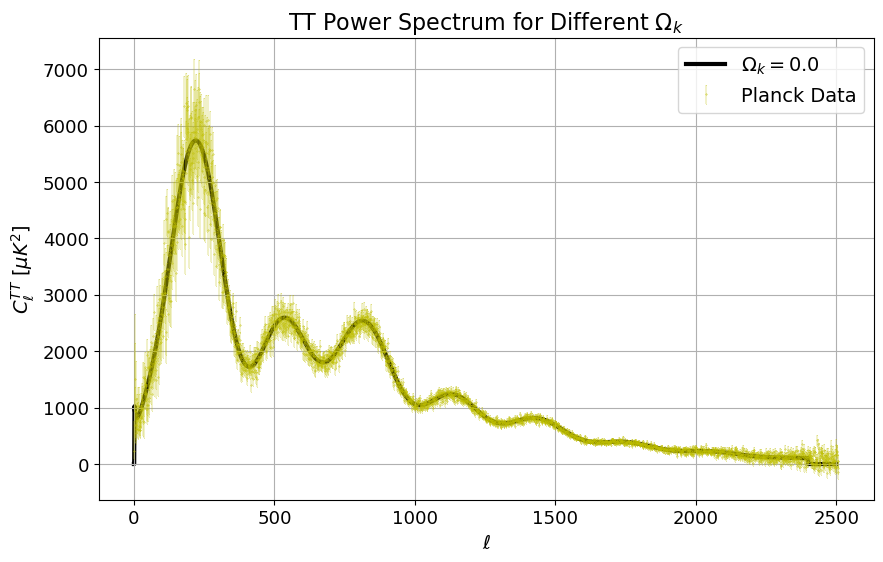

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import camb

# Read the data from the file
file_path = './Dati_planck.txt'
df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['l', 'Dl', '-dDl', '+dDl'])

# Initialize the parameters
params = camb.CAMBparams()

# Set the cosmology parameters (Set Planck 2018 parameters)
params.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)

# Set the primordial power spectrum parameters
params.InitPower.set_params(As=2.105e-9, ns=0.9665)

# Function to calculate the power spectrum for a given omk value
def calculate_power_spectrum(omk_value):
    params.set_cosmology(omk=omk_value, H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561)
    results = camb.get_results(params)
    powers = results.get_cmb_power_spectra(params, lmax=2500, CMB_unit='muK')
    return powers['total']

# Pick omk values to calculate the power spectrum
omk_values = [0.0]

# Calculate the power spectrum for each omk value
spectra = {}
for omk in omk_values:
    spectra[omk] = calculate_power_spectrum(omk)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the Planck data points with error bars and markers
plt.errorbar(df['l'], df['Dl'], yerr=[df['-dDl'], df['+dDl']], fmt='o',  color='y', capsize=0.3, capthick=0.3, elinewidth=0.3, marker='o', markersize=0.3, label='Planck Data', zorder=2)

# Plot the TT power spectrum for the different omk values with a line
for omk in omk_values:
    ell = np.arange(spectra[omk].shape[0])
    cl_tt = spectra[omk][:, 0]
    plt.plot(ell, cl_tt, label=f'$\Omega_k={omk}$', linestyle='-', color='black',linewidth = 3 , zorder=1)

# Customize the plot
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell^{TT}$ [$\mu K^2$]', fontsize=14)
plt.title('TT Power Spectrum for Different $\Omega_k$', fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


The black line (the model) is inside the error bars. So the model is right.